In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# set style
mpl.style.use("ggplot")

# plot inline
%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_pickle("../../cdhitResult/ec0913_df")
cluster_detail = pd.read_pickle("../../cdhitResult/cluster_detail_df")

# core genome, accessory genome
gene_count = df.sum(axis = 0)
core = gene_count.loc[gene_count == 59] 
accessory = gene_count.loc[gene_count != 59]
unique = gene_count.loc[gene_count == 1]
print(len(core), len(accessory), len(unique))

# determine how conserved they are: they are all similar
core_sim = cluster_detail.loc[core.index.values, 'mean similarity'].mean()
acc_sim = cluster_detail.loc[accessory.index.values, 'mean similarity'].mean()
print(core_sim, acc_sim)

# determine the length gap between representing sequence and other members of the family
core_len_gap_se = cluster_detail.loc[core.index.values, 'representing gene length'] - cluster_detail.loc[core.index.values, 'mean length']
accessory_len_gap_se = cluster_detail.loc[accessory.index.values, 'representing gene length'] - cluster_detail.loc[accessory.index.values, 'mean length']
print(core_len_gap_se.mean(), accessory_len_gap_se.mean())

2874 13076 5522
98.943429783 82.2062326726
329.147581819 224.352406137


In [3]:
#cog_category
with open("/home/hermuba/ecoli.cog.list") as f:
    for line in f:
        genome_id = line.split('\t')[0]
        protein_id = line.split('\t')[1]
        head = protein_id+'|'+genome_id
        if head in list(cluster_detail['representing gene header']):
            index = cluster_detail.loc[cluster_detail['representing gene header'] == head].index
            cluster_detail.loc[index, 'cog'] = line.split('\t')[2]
    

In [10]:
cluster_detail.loc[cluster_detail['cog'].isnull()].shape

(7877, 6)

In [57]:
line

'1438670.3\tJMUY01000001_2\tS\n'

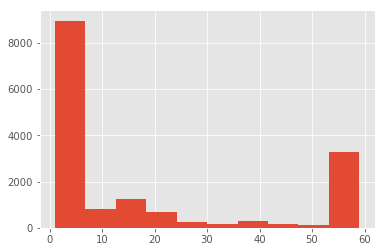

In [10]:
# pangenome distribution
gene_count.hist()

In [49]:
# add on card annotation (each member)
def card_in_cluster(cluster_name):
    count = 0
    members = cluster_detail.loc[cluster_name, 'member'].split(',')[1:] # the first element is ''
    for mem in members:
        genome_id = mem.split('|')[1]
        protein_id = mem.split('|')[0]
        
        df = pd.read_pickle("../../cdhitResult/card_detail_df/"+genome_id)
        if protein_id in df.index:
            count = count + 1
        
    return(count, count/len(members))
for clu in cluster_detail.index:
    count, portion = card_in_cluster(clu)
    cluster_detail.loc[clu, "card_portion"] = portion
    cluster_detail.loc[clu, "card_count"] = count


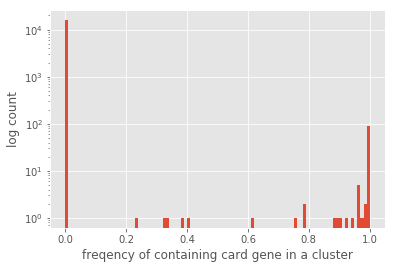

In [50]:
fig, ax = plt.subplots()
cluster_detail['card_portion'].hist(bins = 100, ax = ax)
ax.set_yscale('log')
ax.set_ylabel("log count")
ax.set_xlabel("freqency of containing card gene in a cluster")

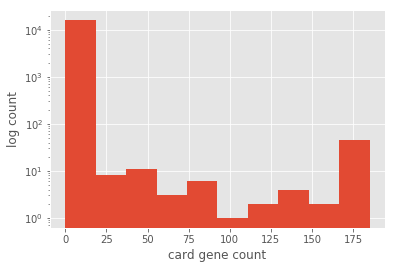

In [51]:
fig, ax = plt.subplots()
cluster_detail['card_count'].hist(bins = 10, ax = ax)
ax.set_yscale('log')
ax.set_ylabel("log count")
ax.set_xlabel("card gene count")

In [79]:
cluster_detail.to_pickle("../../cdhitResult/cluster_detail_tmp1010")

In [137]:
ct = pd.DataFrame(columns = ['core', 'accessory'])
i = 0
for index, row in df.iterrows():
    i = i + 1
    count = df.iloc[:i, :]
    
    count = count.sum(axis = 0)
    
    core = len(count.loc[count == i])
    accessory = 15950 - core ######
    ct.loc[index, 'core'] = core
    ct.loc[index, 'accessory'] = accessory

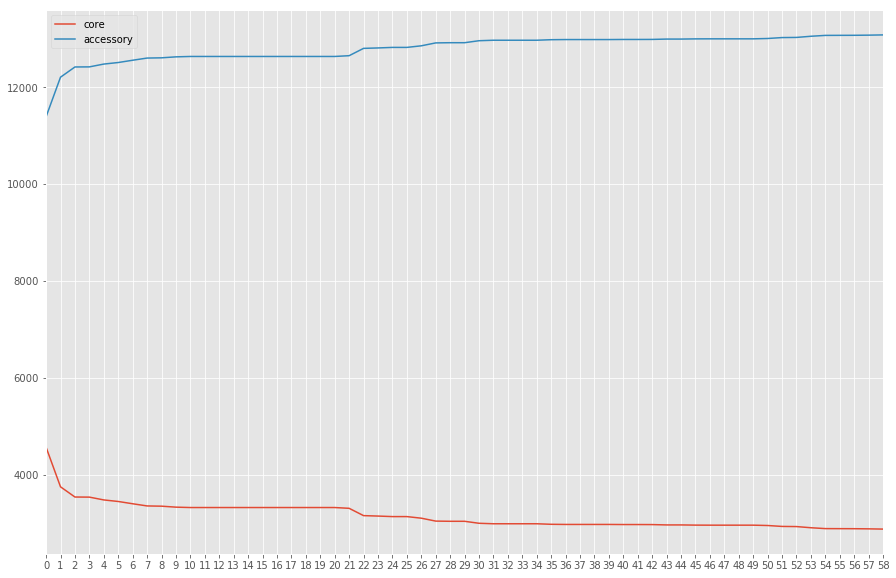

In [145]:
ct.plot(xticks = np.arange(0, 59, 1), use_index = False, figsize = (15,10))

In [123]:
count = df.sum(axis = 0)
core = len(count.loc[count == i])

In [127]:
count = df.sum(axis = 0)
count

Cluster 0         7
Cluster 1         2
Cluster 2         1
Cluster 3         5
Cluster 4         2
Cluster 5        11
Cluster 6         1
Cluster 7         2
Cluster 8         2
Cluster 9        46
Cluster 10        1
Cluster 11        1
Cluster 12       18
Cluster 13        1
Cluster 14       18
Cluster 15       17
Cluster 16        6
Cluster 17        4
Cluster 18        5
Cluster 19        1
Cluster 20       29
Cluster 21        3
Cluster 22        3
Cluster 23        8
Cluster 24        2
Cluster 25        3
Cluster 26        2
Cluster 27       16
Cluster 28        1
Cluster 29        1
                 ..
Cluster 15920     1
Cluster 15921     3
Cluster 15922     1
Cluster 15923     2
Cluster 15924     1
Cluster 15925    10
Cluster 15926     3
Cluster 15927     1
Cluster 15928     1
Cluster 15929     1
Cluster 15930     1
Cluster 15931     1
Cluster 15932     1
Cluster 15933     1
Cluster 15934     1
Cluster 15935     1
Cluster 15936     2
Cluster 15937     1
Cluster 15938     1


In [128]:
count.loc[count == i]

Cluster 55       59
Cluster 72       59
Cluster 83       59
Cluster 90       59
Cluster 115      59
Cluster 140      59
Cluster 142      59
Cluster 145      59
Cluster 150      59
Cluster 153      59
Cluster 164      59
Cluster 175      59
Cluster 185      59
Cluster 187      59
Cluster 192      59
Cluster 209      59
Cluster 215      59
Cluster 218      59
Cluster 222      59
Cluster 229      59
Cluster 247      59
Cluster 248      59
Cluster 252      59
Cluster 256      59
Cluster 261      59
Cluster 275      59
Cluster 280      59
Cluster 281      59
Cluster 284      59
Cluster 285      59
                 ..
Cluster 15008    59
Cluster 15117    59
Cluster 15118    59
Cluster 15119    59
Cluster 15120    59
Cluster 15121    59
Cluster 15123    59
Cluster 15164    59
Cluster 15196    59
Cluster 15200    59
Cluster 15201    59
Cluster 15202    59
Cluster 15245    59
Cluster 15273    59
Cluster 15305    59
Cluster 15404    59
Cluster 15436    59
Cluster 15488    59
Cluster 15489    59


In [124]:
core

2874

In [120]:
ct

,core,accessory
1438693.3,5522,10428
1438681.3,1702,14248
1328432.3,885,15065
1438694.3,374,15576
1328434.3,269,15681
1438695.3,200,15750
1438688.3,171,15779
1400157.3,202,15748
1445862.3,117,15833
1438675.3,73,15877
